The notebook contains the code for the calculation and analysis of pre-covid data to recognise patterns and perform predictions.

Note1: The amounts depited are in USD (United States Dollars)

Import Necessary Libraries

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the scraped csv file into a python dataframe and perform data manilpulation to ensure uniformity

1: Convert the "Date dd/mm/yyyy" column to a proper date format

In [153]:
df = pd.read_csv("/content/drive/MyDrive/Dissertation/startup_funding.csv")

df["Date dd/mm/yyyy"] = pd.to_datetime(df["Date dd/mm/yyyy"], format="%d/%m/%Y", errors='coerce')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Date dd/mm/yyyy    3036 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City  Location     2864 non-null   object        
 6   Investors Name     3020 non-null   object        
 7   InvestmentnType    3040 non-null   object        
 8   Amount in USD      2084 non-null   object        
 9   Remarks            419 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 237.9+ KB


Renaming columns

In [155]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'sector',
    'SubVertical':'subVertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'
    },inplace=True)

In [156]:
df.columns

Index(['Sr No', 'date', 'startup', 'sector', 'subVertical', 'city',
       'investors', 'round', 'amount', 'Remarks'],
      dtype='object')

#Data Cleaning

Removing NULL,duplicate or any unnecessary values

In [157]:
null_values_count = df.isnull().sum()
print(null_values_count)

Sr No             0
date              8
startup           0
sector          171
subVertical     936
city            180
investors        24
round             4
amount          960
Remarks        2625
dtype: int64


In [158]:
df['city'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'Kozhiko

Cleaning 'city' column

In [159]:
df.replace(to_replace=["Bengaluru","Bengaluru","Bangalore","\\\\xc2\\\\xa0Bangalore"],value="Bengaluru",inplace=True)
df.replace(to_replace=["Bhubneswar"],value="Bhubaneswar",inplace=True)
df.replace(to_replace=["\\\\xc2\\\\xa0Noida"],value="Noida",inplace=True)
df.replace(to_replace=["\\\\xc2\\\\xa0Gurgaon"],value="Gurgaon",inplace=True)
df.replace(to_replace=["\\\\xc2\\\\xa0New Delhi"],value="New Delhi",inplace=True)
df.replace(to_replace=["\\\\xc2\\\\xa0Mumbai"],value="Mumbai",inplace=True)

In [160]:
df['amount'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

Cleaning 'amount' column

In [161]:
df['amount'] = df['amount'].str.replace('Undisclosed', '', regex=True)
df['amount'] = pd.to_numeric(df['amount'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df['amount'].fillna(df['amount'].median(), inplace=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sr No        3044 non-null   int64         
 1   date         3036 non-null   datetime64[ns]
 2   startup      3044 non-null   object        
 3   sector       2873 non-null   object        
 4   subVertical  2108 non-null   object        
 5   city         2864 non-null   object        
 6   investors    3020 non-null   object        
 7   round        3040 non-null   object        
 8   amount       3044 non-null   int64         
 9   Remarks      419 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 237.9+ KB


In [163]:
df.shape

(3044, 10)

The pre-covid data is taken from year 2015 to 2018

In [164]:
df_pre = df[(df['date'].dt.year >= 2015) & (df['date'].dt.year <= 2018)]
df_pre.to_csv("startup_data_pre.csv", index=False)

In [165]:
df_pre.shape

(2918, 10)

#Data Visualisations

1. Visualising the top 10 sectors with most startups

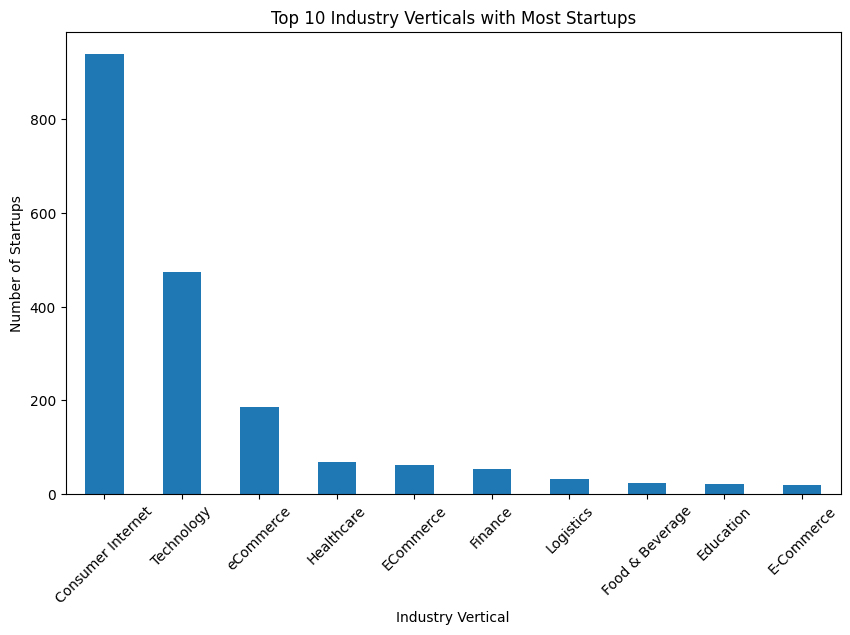

In [166]:
industry_counts = df_pre['sector'].value_counts()

top_industries = industry_counts.nlargest(10)
plt.figure(figsize=(10, 6))
top_industries.plot(kind='bar')
plt.title('Top 10 Industry Verticals with Most Startups')
plt.xlabel('Industry Vertical')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()


2. Visualising the top ten investors for the available startups.

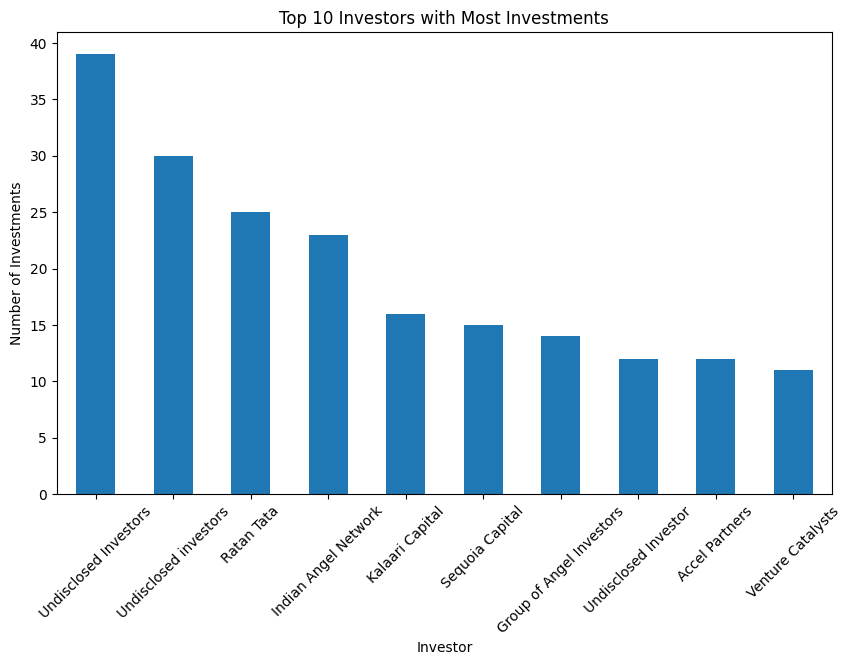

In [167]:
investor_counts = df_pre['investors'].value_counts()

top_investors = investor_counts.nlargest(10)
plt.figure(figsize=(10, 6))
top_investors.plot(kind='bar')
plt.title('Top 10 Investors with Most Investments')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(rotation=45)
plt.show()


3. Plotting the total sum of investments made between the year 2015 and 2018

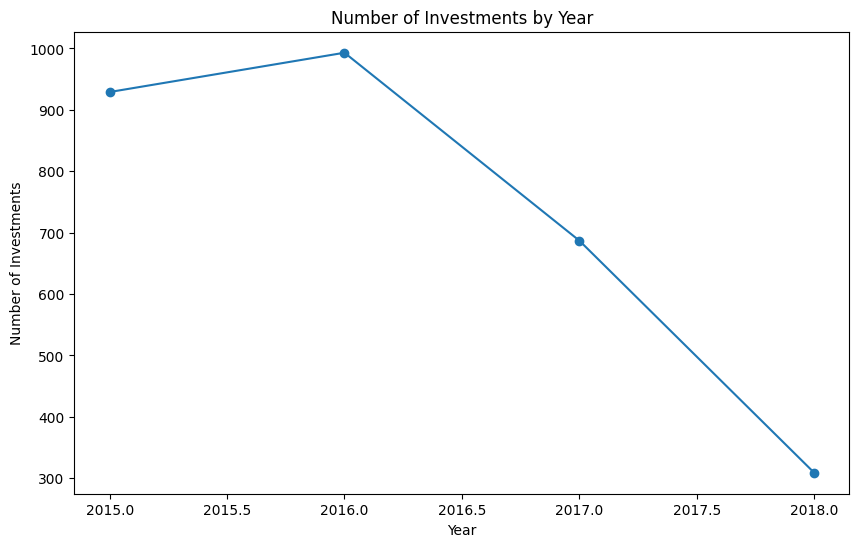

In [168]:
investment_years = df_pre['date'].dt.year
investment_counts_by_year = investment_years.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(investment_counts_by_year.index, investment_counts_by_year.values, marker='o')
plt.title('Number of Investments by Year')
plt.xlabel('Year')
plt.ylabel('Number of Investments')
plt.show()


4. Visualising the total investment made in terms of funding between the years 2015 and 2018

<ipython-input-182-73504bcc9a05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['investment_years']= df_pre['date'].dt.year


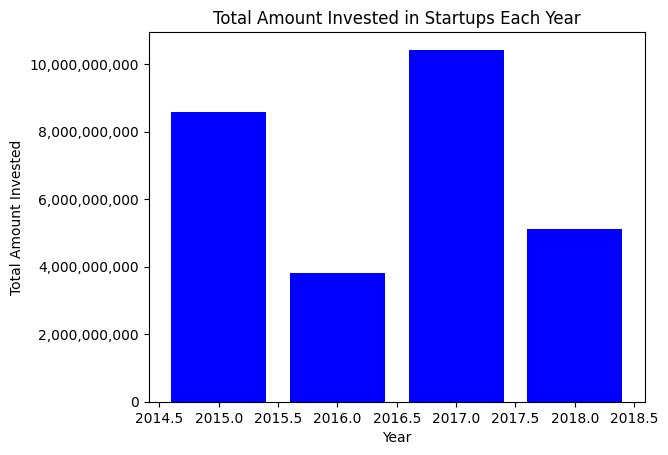

In [182]:

df_pre['investment_years']= df_pre['date'].dt.year
yearly_sum = df_pre.groupby('investment_years')['amount'].sum()

plt.bar(yearly_sum.index, yearly_sum.values, color='blue')

plt.xlabel('Year')
plt.ylabel('Total Amount Invested')
plt.title('Total Amount Invested in Startups Each Year')

def currency_formatter(x, pos):
    return f"{x:,.0f}"

y_format = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(y_format)

plt.show()

5. Visualising the top 10 cities where most of startups were founded

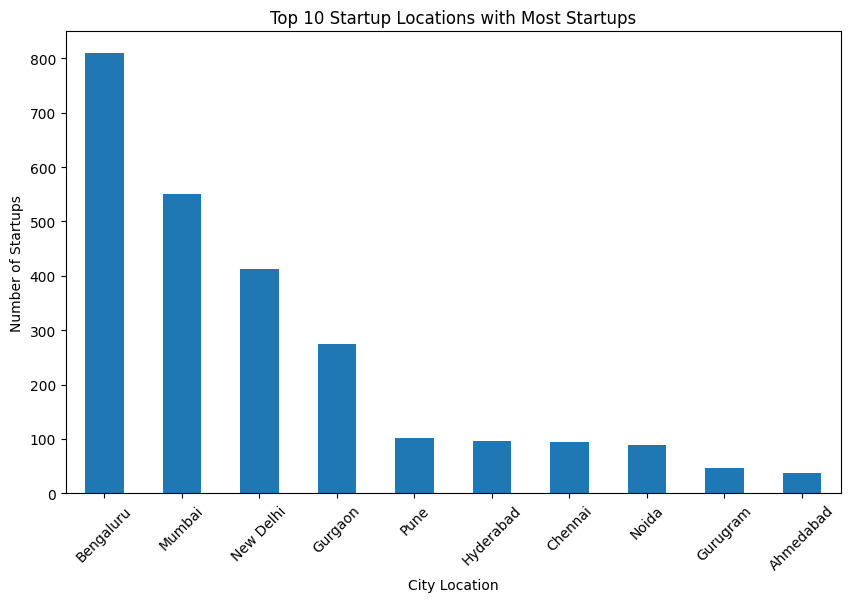

In [170]:
location_counts = df_pre['city'].value_counts()

top_locations = location_counts.nlargest(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar')
plt.title('Top 10 Startup Locations with Most Startups')
plt.xlabel('City Location')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()



In [171]:
# Calculate the total amount invested in all startups
total_investment = df_pre['amount'].sum()
print(f"Total amount invested in all startups: {total_investment}")

# Calculate the average investment amount
average_investment = df_pre['amount'].mean()
print(f"Average investment amount: {average_investment}")

# Calculate the median investment amount
median_investment = df_pre['amount'].median()
print(f"Median investment amount: {median_investment}")

# Calculate the number of unique startups
unique_startups = df_pre['startup'].nunique()
print(f"Number of unique startups: {unique_startups}")


Total amount invested in all startups: 27970724075
Average investment amount: 9585580.560315285
Median investment amount: 450000.0
Number of unique startups: 2379


#Machine Learning and Performance Analysis

Reading the cleaned data to apply machine learning algorithms

In [172]:
data = pd.read_csv('startup_data_pre.csv')

data.fillna("", inplace=True)

label_encoder = LabelEncoder()
data['city'] = label_encoder.fit_transform(data['city'])
data['round'] = label_encoder.fit_transform(data['round'])

X = data[['round', 'city']]
y = data['amount']


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [174]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

y_pred = y_pred_svm

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred))
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.3373287671232877
Precision: 0.3373287671232877
Recall: 0.3373287671232877
F1 Score: 0.1701761001876765
Confusion Matrix:
[[197   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]


Tree-based classifiers

In [175]:
# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forests
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Extremely Randomized Trees
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)



In [176]:
# Neural Networks (Multi-Layer Perceptron)
nn_model = MLPClassifier(hidden_layer_sizes=(150,100,50),activation = 'relu',random_state=42,max_iter=500)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

Funtion to evaluate all the above mentioned machine learning models

In [177]:
def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred))
    recall = recall_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred))
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("-----------------------------")

# Evaluate each model
evaluate_model("Decision Trees", y_test, y_pred_dt)
evaluate_model("Random Forests", y_test, y_pred_rf)
evaluate_model("Extremely Randomized Trees", y_test, y_pred_et)
evaluate_model("Neural Networks", y_test, y_pred_nn)

Model: Decision Trees
Accuracy: 0.3202
Precision: 0.2344
Recall: 0.6426
F1 Score: 0.1712
Confusion Matrix:
[[187   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
-----------------------------
Model: Random Forests
Accuracy: 0.3219
Precision: 0.2881
Recall: 0.6528
F1 Score: 0.1749
Confusion Matrix:
[[187   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
-----------------------------
Model: Extremely Randomized Trees
Accuracy: 0.3185
Precision: 0.2386
Recall: 0.6503
F1 Score: 0.1710
Confusion Matrix:
[[186   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
-----------------------------
M

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

#Analysis of all the models

1. Models comparision for Accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Text(0.5, 1.0, 'Model Comparison - Accuracy')

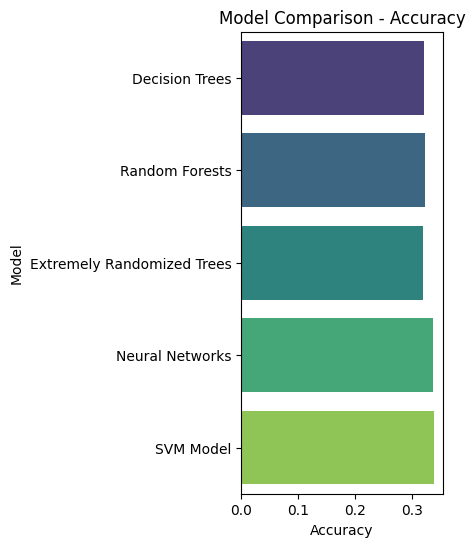

In [178]:
models = [
    ("Decision Trees", y_pred_dt),
    ("Random Forests", y_pred_rf),
    ("Extremely Randomized Trees", y_pred_et),
    ("Neural Networks", y_pred_nn),
    ("SVM Model", y_pred_svm)
]

model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for model_name, y_pred in models:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred))
    recall = recall_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred))
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=metrics_df, palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Accuracy')

2. Models comparision for Recall

Text(0.5, 1.0, 'Model Comparison - Recall')

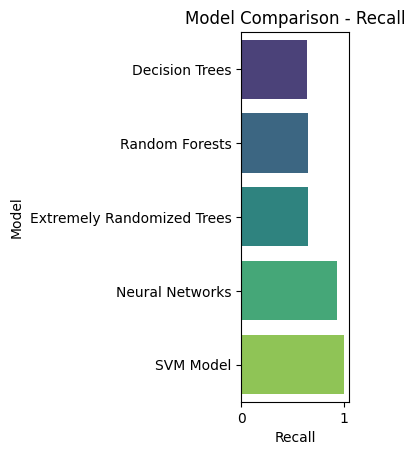

In [179]:
plt.subplot(1, 4, 3)
sns.barplot(x='Recall', y='Model', data=metrics_df, palette='viridis')
plt.xlabel('Recall')
plt.title('Model Comparison - Recall')

3. Models comparision for F1 score

<ipython-input-180-aba56b5f96eb>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


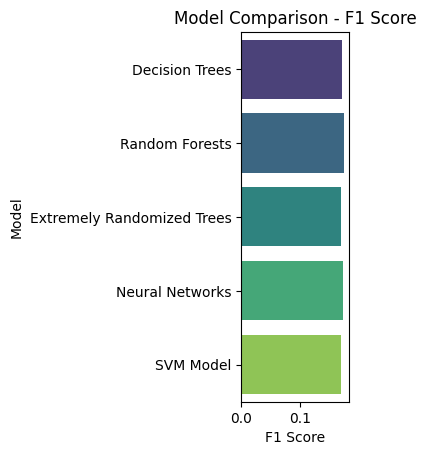

In [180]:
plt.subplot(1, 4, 4)
sns.barplot(x='F1 Score', y='Model', data=metrics_df, palette='viridis')
plt.xlabel('F1 Score')
plt.title('Model Comparison - F1 Score')

plt.tight_layout()
plt.show()

*4*. Models comparision for Precision

Text(0.5, 1.0, 'Model Comparison - Precision')

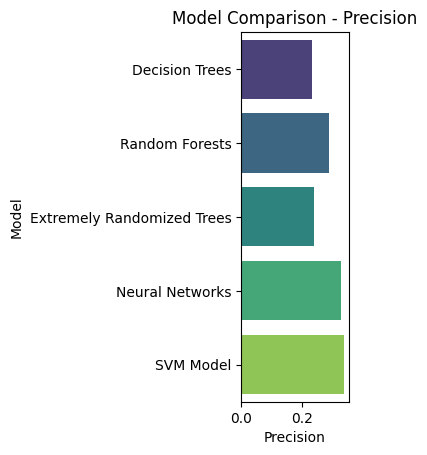

In [181]:
plt.subplot(1, 4, 2)
sns.barplot(x='Precision', y='Model', data=metrics_df, palette='viridis')
plt.xlabel('Precision')
plt.title('Model Comparison - Precision')